In [2]:
import pandas as pd

# Load CSV file
data = pd.read_csv("352__ADH_full_range.csv")


In [3]:
print(data.head(10))  # Display the first few rows of the DataFrame


   CHR    START       END Region_Type
0    1   840001   2250000           0
1    1  2250000   2520001           0
2    1  2520001   6240000           0
3    1  6240000   7500001        Gain
4    1  7500001   7770001        Gain
5    1  7770001   8220000        Gain
6    1  8220000   8220001        Gain
7    1  8220001   8790000        Gain
8    1  8790000   9150001        Gain
9    1  9150001  10860000        Gain


In [8]:
import matplotlib.pyplot as plt

# Convert Region_Type to numerical values for plotting
data['Value'] = data['Region_Type'].apply(lambda x: 1 if x == 'Gain' else (-1 if x == 'Loss' else 0))
data['Region_Length'] = data['END'] - data['START']

print(data.head(10))


   CHR    START       END Region_Type  Value
0    1   840001   2250000           0      0
1    1  2250000   2520001           0      0
2    1  2520001   6240000           0      0
3    1  6240000   7500001        Gain      1
4    1  7500001   7770001        Gain      1
5    1  7770001   8220000        Gain      1
6    1  8220000   8220001        Gain      1
7    1  8220001   8790000        Gain      1
8    1  8790000   9150001        Gain      1
9    1  9150001  10860000        Gain      1


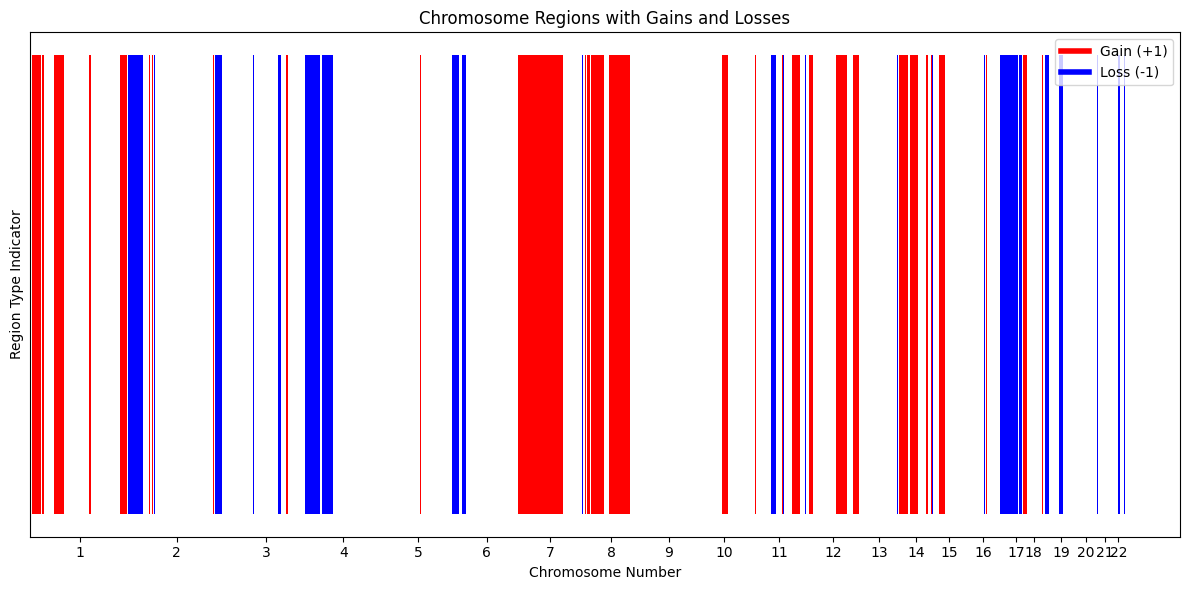

In [14]:
# Calculate cumulative positions, separating chromosomes
spacing = 1000000  # Space between chromosomes for visual separation
data['Position'] = 0  # Initialize Position column

# Start from the beginning and calculate positions
current_position = 0
for chr_num in sorted(data['CHR'].unique()):
    chr_data = data[data['CHR'] == chr_num]
    data.loc[chr_data.index, 'Position'] = current_position + chr_data['Region_Length'].cumsum().shift(fill_value=0)
    current_position = data.loc[chr_data.index, 'Position'].iloc[-1] + spacing

# Plot each chromosome region in sequence with color-coded region types
plt.figure(figsize=(12, 6))

for i, row in data.iterrows():
    color = 'red' if row['Value'] == 1 else ('blue' if row['Value'] == -1 else 'white')
    plt.barh(y=0, width=row['Region_Length'], left=row['Position'], color=color, align='edge')

# Add chromosome labels
chr_ticks = data.groupby('CHR')['Position'].first() + data.groupby('CHR')['Region_Length'].sum() / 2
plt.xticks(chr_ticks, sorted(data['CHR'].unique()))

# Customize plot
plt.xlabel("Chromosome Number")
plt.ylabel("Gain/Loss")
plt.title("Chromosome Regions with Gains and Losses")
plt.yticks([])  # Hide y-axis ticks for a cleaner look
plt.legend(handles=[
    plt.Line2D([0], [0], color='red', lw=4, label='Gain'),
    plt.Line2D([0], [0], color='blue', lw=4, label='Loss'),
], loc="upper right")
plt.tight_layout()
plt.show()